                                                                   SUPERVISED LEARNING                                                                   .


- Machine learning where the algo is trained on labeled data. This means that each training example provided to the algorithm consists of an input paired with the correct output

- For Example, in a dataset of emails, the input might be the content of the email, and the label (output) could be whether the email is spam or no spam. The algorithm usus this data to learn how to classify new and unseen emails

- Purpose: To predict Output labels for  unseen data based on training data. In other words, the algorithm builds a model based on the training data and once it has learned the patterns, it can generalize and make predictions on new , unknown data.


- types of supervised learning: 

       Regression:  predicting continuous values. This means that the output variable is a real number or continuous value
           - Predicting house prices based on features like size, location, and no of rooms.
           - Forecasting the temperature for the next day based on past data
           
       Classification: predicting discrete labels or categories (eg., spam vs non spam)
           - Classifying emails as "spam" or "not spam" based on content.
           - determining whether a tumor is "malignant" or "benign" based on medical features like size, shape and other characteristics 

Steps to build a Machine learning Model

     - Load the dataset
     - Preprocess the data (handling missing values, encoding ,scaling,outliers)
     - Exploratory Data Analysis (EDA) ( Statistics, check relationships, visualize treds,features selection)
     - Split the data into training and training sets (70-80% for training, 30-20% for testing)
     - Select and train the model
     - Evaluate model Performance
     - Hyperparameter tuining (optimization using grid search or random search)
     - make predictions
     - visualize the results

                                                   Common Supervised Learning Algorithms                                                              .

1. Linear Regression
    - used for predicting continuous variables (i.e regression problems). It established a relationship between an independent variable (input) and da dependent variable (output) using a straight line equation


    - Ex : predicting sales revenue based on an advertising budget
          
          suppose a company wants to understand how much sales revenue they will generate based on diff advert budgets 

         the model learns the relationship between the amt spent on advert(Input) and sales revenue(output)

    The equation is usually of the form :  Y = mX + c


commonly used dataset to practice : fmri, diamonds, mpg, penguins, iris

In [55]:
# Tips Dataset

#import libraries
import seaborn as sns
import pandas as pd 

#load dataset
df = sns.load_dataset('tips')   
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [56]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [57]:
# summary statistics
print (df.describe())

#exploring the data set
df.info()   


       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


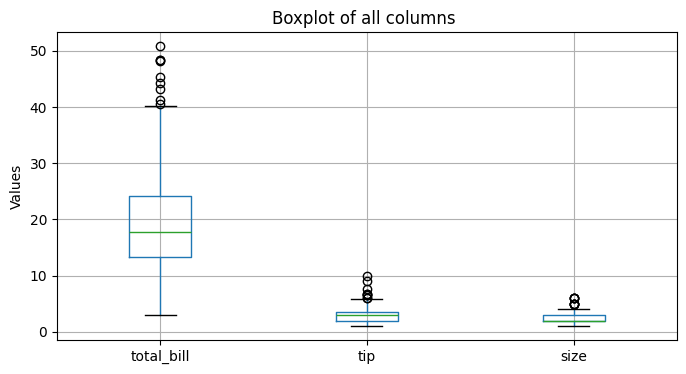

In [58]:
#checking for outliers
import matplotlib.pyplot as plt

df.boxplot(figsize=(8,4))  # pandas method automatically creates boxplot for numerical columns
plt.title('Boxplot of all columns ')
plt.ylabel('Values')
plt.show()

In [59]:
# we can see that there is an outlier 

#removing outliers
# calculating Q1 and Q3

Q1 = df['total_bill'].quantile(0.25) # 25th percentile
Q3 = df['total_bill'].quantile(0.75) # 75th percentile

#calculating IQR - Interquartile Range
IQR = Q3 - Q1

# Calculating Lower and Upper Bound - any value outside these bounds is considered an outlier
lower_bound = Q1 - 1.5 * (Q3 - Q1)
upper_bound = Q3 + 1.5 * (Q3 - Q1)

#identifying outliers
outliers = df[(df['total_bill'] < lower_bound) | (df['total_bill'] > upper_bound)]
outliers


,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


Scaling is not required for linear regression tasks it is only needed when future scales different

In [35]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [73]:
#applying one hot encoding  to day and type

from sklearn.preprocessing import OneHotEncoder

#initialize object
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy variable trap

#transform the data
encoded_data = encoder.fit_transform(df[['day', 'time','sex','smoker']])

#convert to DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['day', 'time','sex','smoker']))
encoded_df

,day_Sat,day_Sun,day_Thur,time_Lunch,sex_Male,smoker_Yes
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
239,1.0,0.0,0.0,0.0,1.0,0.0
240,1.0,0.0,0.0,0.0,0.0,1.0
241,1.0,0.0,0.0,0.0,1.0,1.0
242,1.0,0.0,0.0,0.0,1.0,0.0


In [38]:
# smoker will be not included becz smoker yes=1 no=0 and it is already binary

In [40]:
# combine encoded_df with original df
df_encoded = pd.concat([df,encoded_df], axis=1)
df_encoded = df_encoded.drop(['sex','smoker','day','time'], axis = 1)  # drop original categorical columns
df_encoded.head()   

,total_bill,tip,size,day_Sat,day_Sun,day_Thur,time_Lunch,sex_Male,smoker_Yes
0,16.99,1.01,2,0.0,1.0,0.0,0.0,0.0,0.0
1,10.34,1.66,3,0.0,1.0,0.0,0.0,1.0,0.0
2,21.01,3.50,3,0.0,1.0,0.0,0.0,1.0,0.0
3,23.68,3.31,2,0.0,1.0,0.0,0.0,1.0,0.0
4,24.59,3.61,4,0.0,1.0,0.0,0.0,0.0,0.0


In [72]:
#capping outliers in total_bill column
df_encoded['total_bill'] = df_encoded['total_bill'].apply(lambda x: min(max(x, lower_bound), upper_bound))

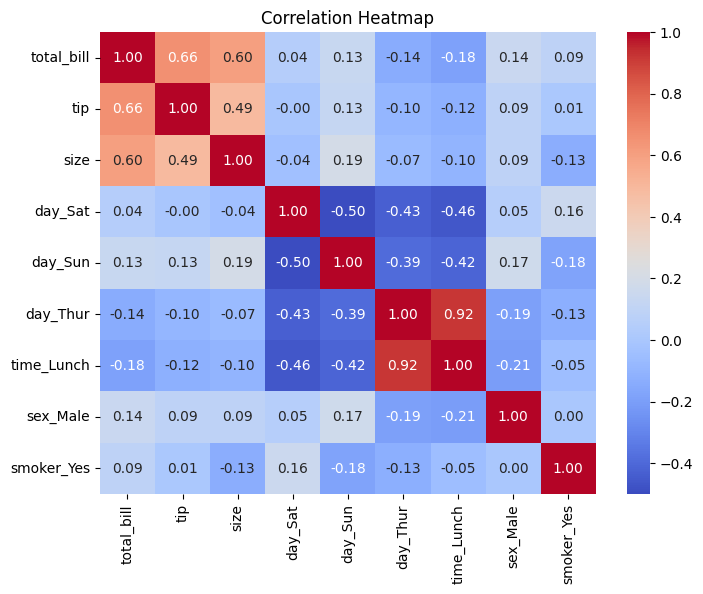

In [43]:
# correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")   # .2f for 2 decimal places
plt.title('Correlation Heatmap')    
plt.show()

In [44]:
# WE WILL REMOVE TIP AND GENDER BECZ they are less correlated with target variable total_bill
# we can say that total bill and size have strong correlation theys should be considered as imp features
# we cannot completely remover day of the week 

# remving sex_male and #

<function matplotlib.pyplot.show(close=None, block=None)>

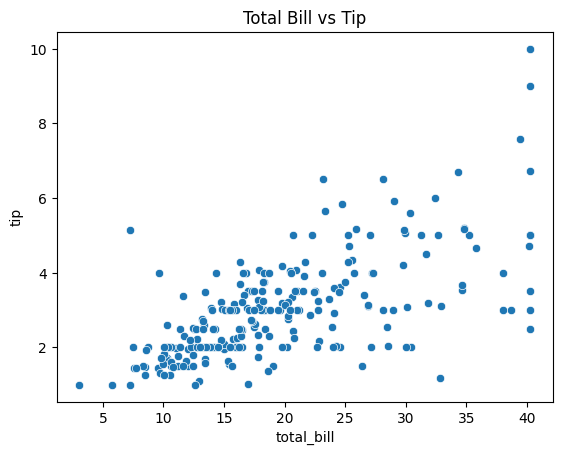

In [ ]:
# scatterplot between total_bill and tip to check if higher bill amounts lead to higher tips
sns.scatterplot(x=df_encoded['total_bill'], y=df_encoded['tip'])
plt.title('Total Bill vs Tip')
plt.show  

In [48]:
df_encoded


,total_bill,tip,size,day_Sat,day_Sun,day_Thur,time_Lunch,sex_Male,smoker_Yes
0,16.99,1.01,2,0.0,1.0,0.0,0.0,0.0,0.0
1,10.34,1.66,3,0.0,1.0,0.0,0.0,1.0,0.0
2,21.01,3.50,3,0.0,1.0,0.0,0.0,1.0,0.0
3,23.68,3.31,2,0.0,1.0,0.0,0.0,1.0,0.0
4,24.59,3.61,4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1.0,0.0,0.0,0.0,1.0,0.0
240,27.18,2.00,2,1.0,0.0,0.0,0.0,0.0,1.0
241,22.67,2.00,2,1.0,0.0,0.0,0.0,1.0,1.0
242,17.82,1.75,2,1.0,0.0,0.0,0.0,1.0,0.0


In [66]:
#splitting the data set

from sklearn.model_selection import train_test_split    

#define features (x) and target variable (y)
x = df_encoded.drop(columns=['tip'], axis=1)  # features
#x = df_encoded.drop(columns=['sex_Male'], axis=1)
#x = df_encoded.drop(columns=['smoker_Yes'], axis=1)
y = df_encoded['tip']  # target variable



#spilit the dataset into training (80%) and testing (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  

# to check the split
print("x_train shape:", x_train.shape)

x_train shape: (195, 9)


In [67]:
# train the linear regression model
from sklearn.linear_model import LinearRegression

#initialize the model
model = LinearRegression()

# train the model
model.fit(x_train, y_train) 

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [68]:
#make predictions
y_pred = model.predict(x_test)
y_pred

array([3.18166048, 2.42275337, 2.63677758, 4.49776031, 1.73991356,
       1.61598336, 3.01372462, 2.73512308, 3.13524872, 2.7099198 ,
       2.80568621, 1.52579612, 1.54381238, 1.53050457, 1.98600807,
       1.74745968, 3.60857761, 3.54347171, 2.50075706, 5.8544133 ,
       2.81770472, 3.42496124, 3.82873643, 1.58542586, 2.9475895 ,
       2.60005513, 1.69936233, 4.14872855, 2.09343878, 5.72769866,
       4.82724409, 1.5111631 , 2.64782865, 2.87746947, 3.31477879,
       3.35689007, 1.2036465 , 5.37612859, 2.93940517, 2.15110191,
       1.2213199 , 2.0486149 , 2.73656769, 1.68854719, 2.00663422,
       2.83132642, 1.35624631, 2.55696834, 1.9023138 ])

In [69]:
#model evaluation
from sklearn.metrics import mean_squared_error, r2_score

#MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

#r squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2:.2f}')

Mean Squared Error: 0.2046285070645213
R-squared Score: 0.84


mean squared error : 0.7 - with outliers
R squared score : 0.44


Try removing outliers (drop it)

In [74]:
# feature engineering

#we are finding the realtive behaviour
df_encoded['tip_percentage'] = df_encoded['tip'] / df_encoded['total_bill']

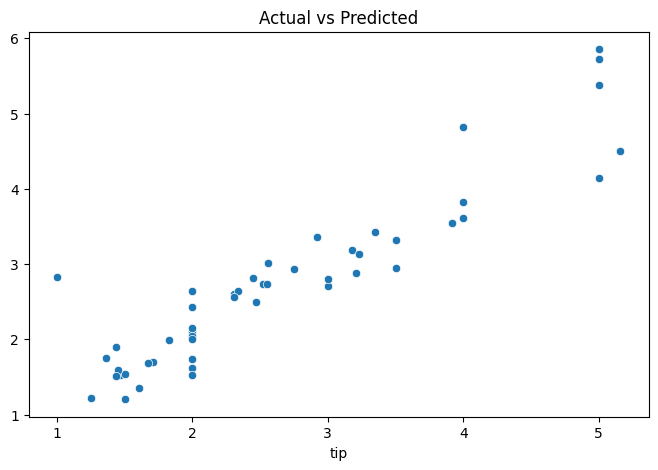

In [78]:
#visualize the results
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted')
plt.show()


In [1]:
# CASE : capping outliers for total_bill and remove sex,smoker

2. Decision Trees

 - Used for both classification and regression tasks.
 - Example : classifying whether a customer will leave a suscription service
      
      A decision tree works by splitting data based on the most informative feature

 - Example
     if a customer calls support freq and has not used the product in last month they are likely to churn
     if a customer has high engagement and long suscription history

 The tree grows by asking yes or now questions at each step and ultimately it predicts the outcome (churn or not)

 decision trees are useful becz they are interpretable and can handle both numerical and categorical data 

No feature Scaling
Root nodes :- top most imp 
leaf nodes :- end part

In [2]:
#import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

#load iris dataset
df = sns.load_dataset('iris')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


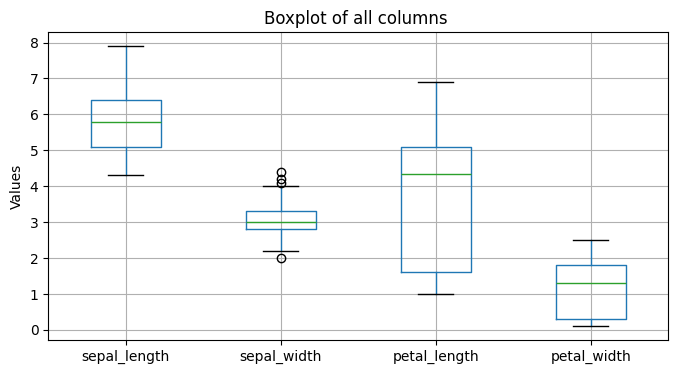

In [ ]:
#box plot and checking the outliers as we did before
import matplotlib.pyplot as plt
df.boxplot(figsize=(8,4))  
plt.title('Boxplot of all columns ')
plt.ylabel('Values')
plt.show()  

In [4]:
#finding missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [27]:
#split the data into train and test sets

x = df.drop(columns=['species'])
y = df['species']  # target variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y) #stratification to maintain class distribution , if we have some imbalance in target classes   proportion in each class will remain same


# train a basic Decision Tree model

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

#make predictions
y_pred = dt_model.predict(x_test)

#evaluate the model
y_pred_train = dt_model.predict(x_train)

#evaluate the model

accuracy = accuracy_score(y_test, y_pred)
training_accuracy = accuracy_score(y_train, y_pred_train)
print(f'model accuracy: {accuracy:.2f}')
print(f'training accuracy: {training_accuracy:.2f}')
print("Classification Report:\n", classification_report(y_test, y_pred))

model accuracy: 0.93
training accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



we do classification report , by looking at accuracy dont think model is performing well we should always look for other performing matrics

so we used classificiation

precision - out of predicted +ve cases , how many of them are actually or correctly classified

recall - how many did the model identify

f1-score - balance btw precision and recall

support - how many that feature or  reports we have in test data


macro avg - simple avg of all the metrics or classes

weighted avg - here with weighted items we give avg


underfitting  - even on training data the model is too simple to solve a tasks or complex tasks , high bias, low data can lead to underfitting
overfitting   - high variance low bias - model is performing well on training data, but in new test data its performance is pooor



cross- validation tech have 3 types

    - k-fold  = shown below , it actually mean k no of fold, splitting dataset in k equal parts, one fold used as test and k-1 will beused as training and repeated for k times,  and we take avg of all the performance ,,, if it is overfitting the model is not consistant across the fold

    - stratified k-fold  = it will ensure that equal proportion we are giving to all the classes, 
    - leave-one-out  = here  k = no of samples or no of rows inside the data set , we train on all the samples except 1, and that remaining 1 will be used to test the dataset, its very accurate but its computational is very expensive for large dataset

In [28]:
from sklearn.model_selection import cross_val_score

# cross validation is evaluating the model on different subsets of the data to ensure it generalizes well , to check if our model is overfitting or not

cross_val_scores = cross_val_score(dt_model, x, y, cv=5)  # 5-fold cross validation
print(f'Cross-validation scores: {cross_val_scores}')
print(f'mean Cross-validation score: {np.mean(cross_val_scores):.2f}')

Cross-validation scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
mean Cross-validation score: 0.95


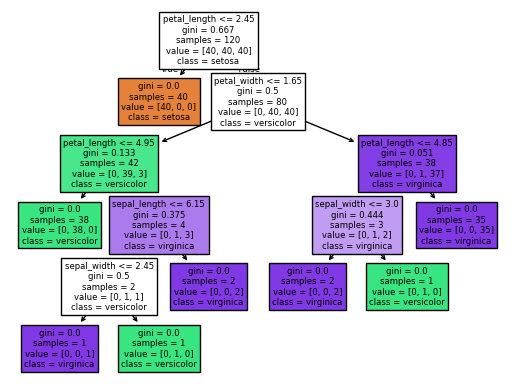

In [29]:
from sklearn.tree import plot_tree
plot_tree(dt_model, filled=True, feature_names=x.columns, class_names=y.unique())
plt.show()

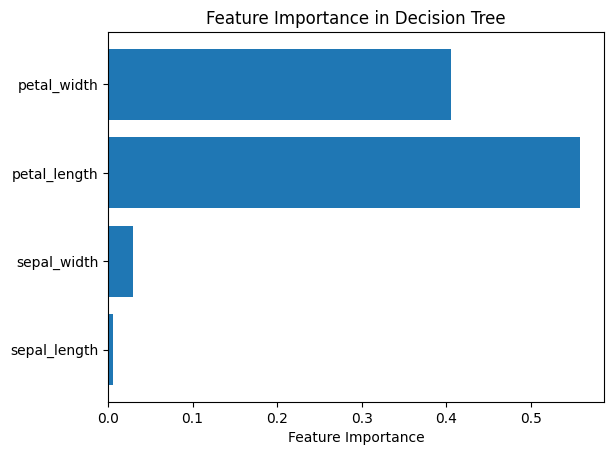

In [30]:
#improvements
#1.features importance - try removing sepal_length

ft = dt_model.feature_importances_
features = x.columns
plt.barh(features, ft)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree')
plt.show()


In [24]:
#2 pruning : it is method to reduce the size of decision tree by removing sections of the tree that provide little power to classify instances . it helps in reducing overfitting and improves model generalization

# goal is to remove overfitting and improve accuracy on unseen data

dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=4, min_samples_split=2)

In [36]:
#Hyperparameter tuning can also be done using GridSearchCV 

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-validation Score:", f"{grid_search.best_score_:.2f}")

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-validation Score: 0.94


In [1]:
print("abc")

abc


In [2]:
print("helloworkd")

helloworkd


In [3]:
print("s djhasbdhsdbasd")

s djhasbdhsdbasd
